Student Performance Indicator 
#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
#

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data as pandas dataframe

In [4]:
df=pd.read_csv('stud.csv')

Read the first 5 data

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of dataset

In [6]:
df.shape

(1000, 8)

Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Dataset have no null values

Checking dublicate values

In [8]:
df.duplicated().sum()

np.int64(0)

Dataset has no duplicate value

Checking unique value

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Unique categories in gender:",df["gender"].unique())
print("Unique categories in race_ethnicity:",df["race_ethnicity"].unique())
print("Unique categories in parental_level_of_education:",df["parental_level_of_education"].unique())
print("Unique categories in lunch:",df["lunch"].unique())
print("Unique categories in test_preparation_course:",df["test_preparation_course"].unique())

Unique categories in gender: ['female' 'male']
Unique categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in lunch: ['standard' 'free/reduced']
Unique categories in test_preparation_course: ['none' 'completed']


In [13]:
#define categorical and numerical columns
categorical_col=[feature for feature in df.columns if df[feature].dtypes=='O']
numerical_col=[feature for feature in df.columns if df[feature].dtypes!='O']
#print categorical and numerical columns
print('Categorical columns:',categorical_col)
print('Numerical columns:',numerical_col)

Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical columns: ['math_score', 'reading_score', 'writing_score']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=df['Total_Score']/3



In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
math_score_full=df[df['math_score']==100]['Average_Score'].count()
reading_score_full=df[df['reading_score']==100]['Average_Score'].count()
writing_score_full=df[df['writing_score']==100]['Average_Score'].count()
#print number of students who scored full marks in each subject
print("Number of students who scored full marks in Math:",math_score_full)
print("Number of students who scored full marks in Reading:",reading_score_full)
print("Number of students who scored full marks in Writing:",writing_score_full)

Number of students who scored full marks in Math: 7
Number of students who scored full marks in Reading: 17
Number of students who scored full marks in Writing: 14


In [18]:
math_score_less_20=df[df['math_score']<20]['Average_Score'].count()
reading_score_less_20=df[df['reading_score']<20]['Average_Score'].count()
writing_score_less_20=df[df['writing_score']<20]['Average_Score'].count()
#print number of students who scored less than 20 marks in each subject
print("Number of students who scored less than 20 marks in Math:",math_score_less_20)
print("Number of students who scored less than 20 marks in Reading:",reading_score_less_20)
print("Number of students who scored less than 20 marks in Writing:",writing_score_less_20)


Number of students who scored less than 20 marks in Math: 4
Number of students who scored less than 20 marks in Reading: 1
Number of students who scored less than 20 marks in Writing: 3


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

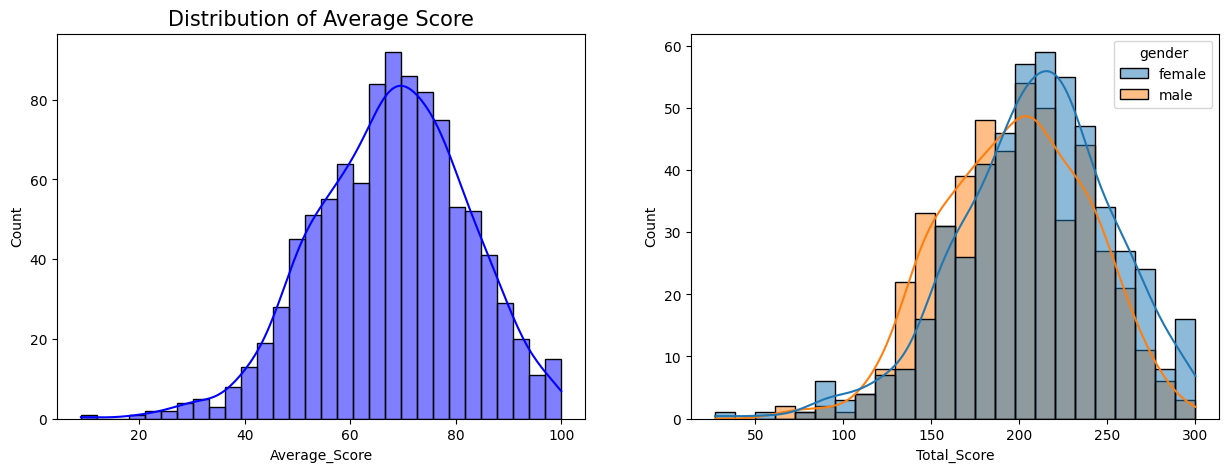

In [19]:
fig, asis=plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Average_Score', kde=True, bins=30, color='blue')
plt.title('Distribution of Average Score', fontsize=15)
plt.subplot(1,2,2)
sns.histplot(data=df, x='Total_Score', kde=True,hue='gender')
plt.show()


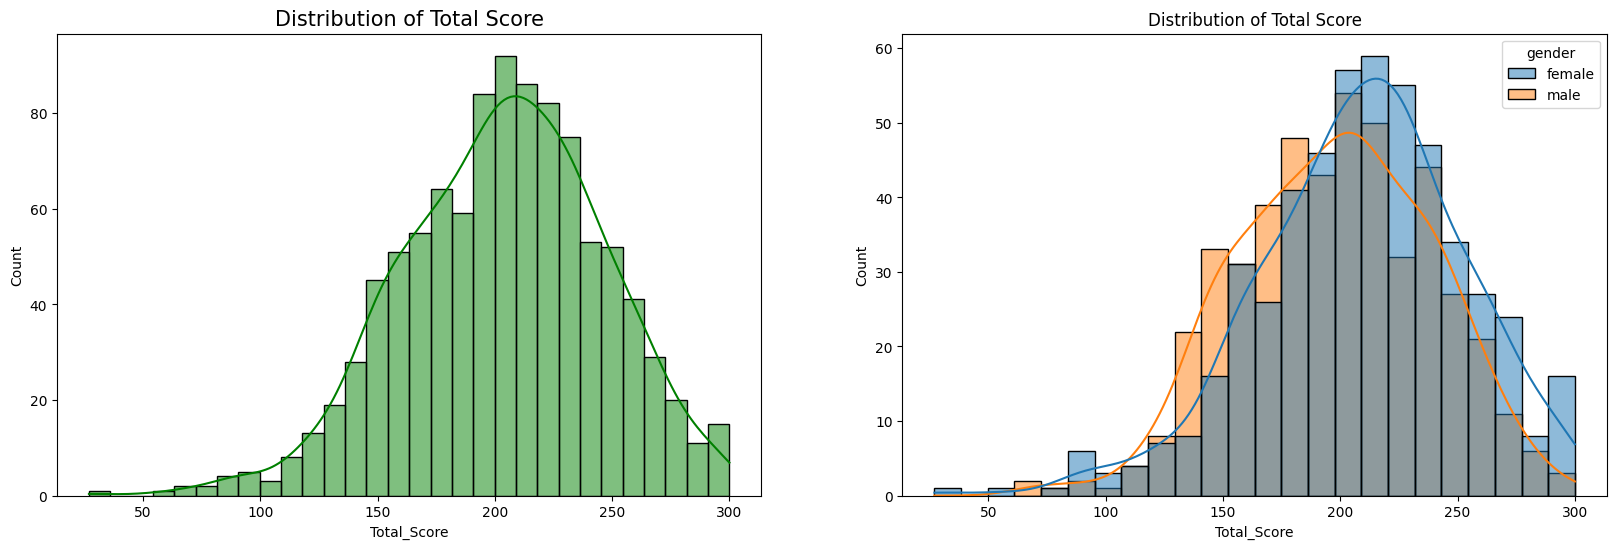

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Total_Score',kde=True,bins=30,color='green')
plt.title('Distribution of Total Score', fontsize=15)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.title('Distribution of Total Score')
plt.show()

Insites 
### female perform well in study compare to male

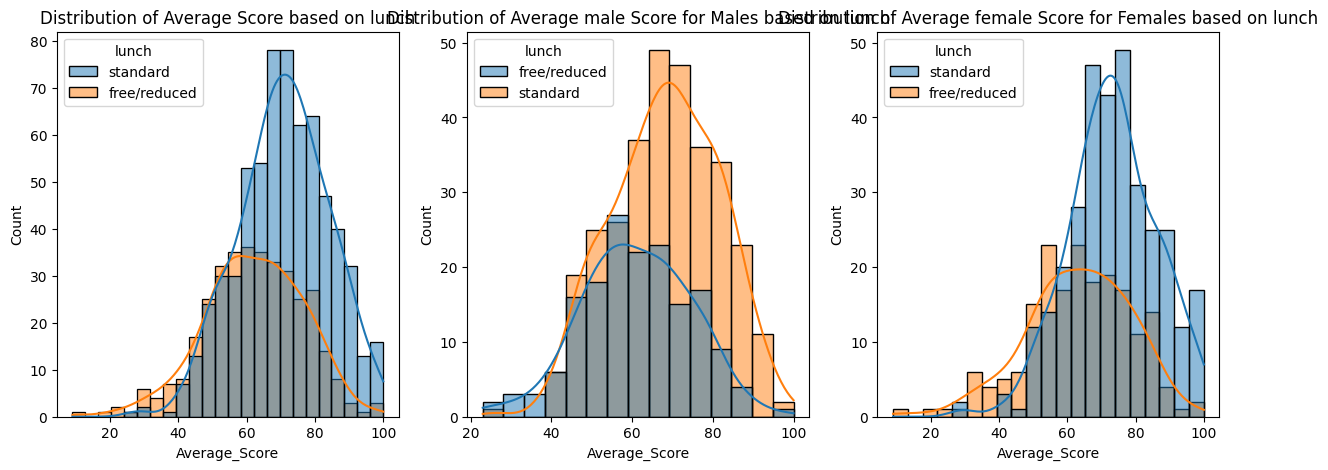

In [21]:
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='Average_Score', kde=True, hue='lunch')
plt.title('Distribution of Average Score based on lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'], x='Average_Score', kde=True, hue='lunch')
plt.title('Distribution of Average male Score for Males based on lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'], x='Average_Score', kde=True, hue='lunch')
plt.title('Distribution of Average female Score for Females based on lunch')
plt.show()

### Standard lunch helps to perfom well in exam


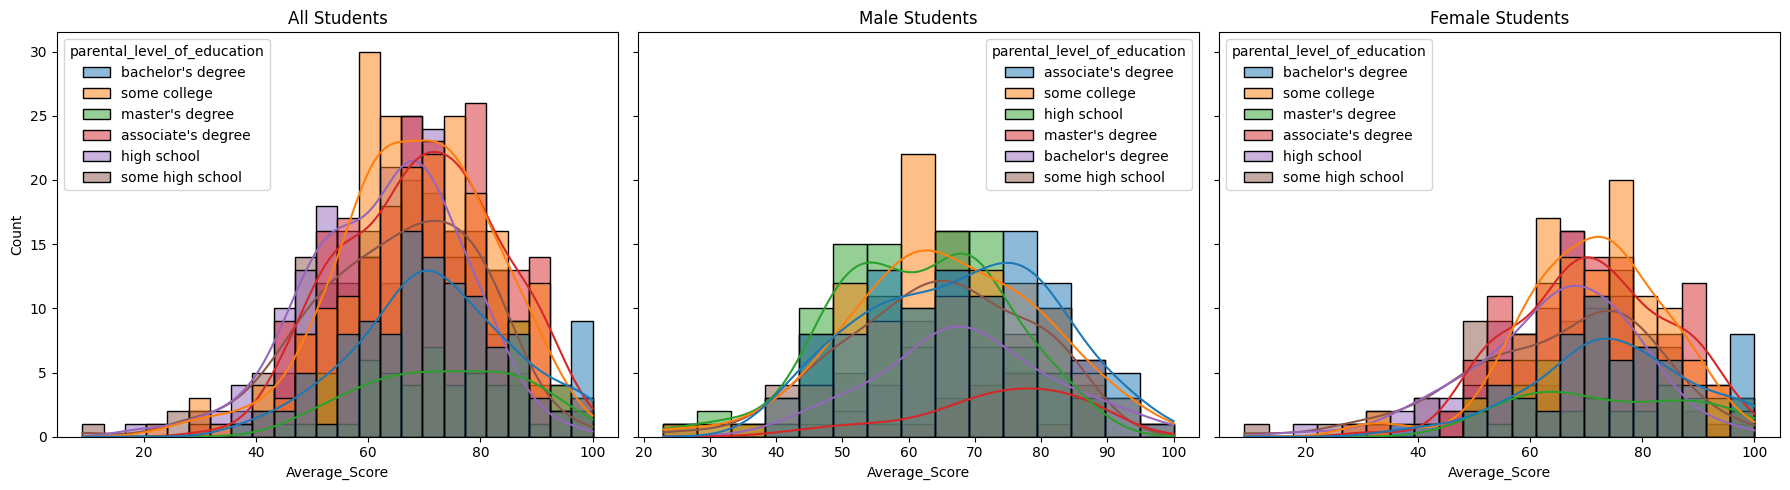

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# All students
sns.histplot(data=df, x='Average_Score', kde=True, 
             hue='parental_level_of_education', ax=axes[0])
axes[0].set_title("All Students")

# Male students
sns.histplot(data=df[df.gender=='male'], x='Average_Score', kde=True, 
             hue='parental_level_of_education', ax=axes[1])
axes[1].set_title("Male Students")

# Female students
sns.histplot(data=df[df.gender=='female'], x='Average_Score', kde=True, 
             hue='parental_level_of_education', ax=axes[2])
axes[2].set_title("Female Students")

plt.tight_layout()
plt.show()
plt.show()

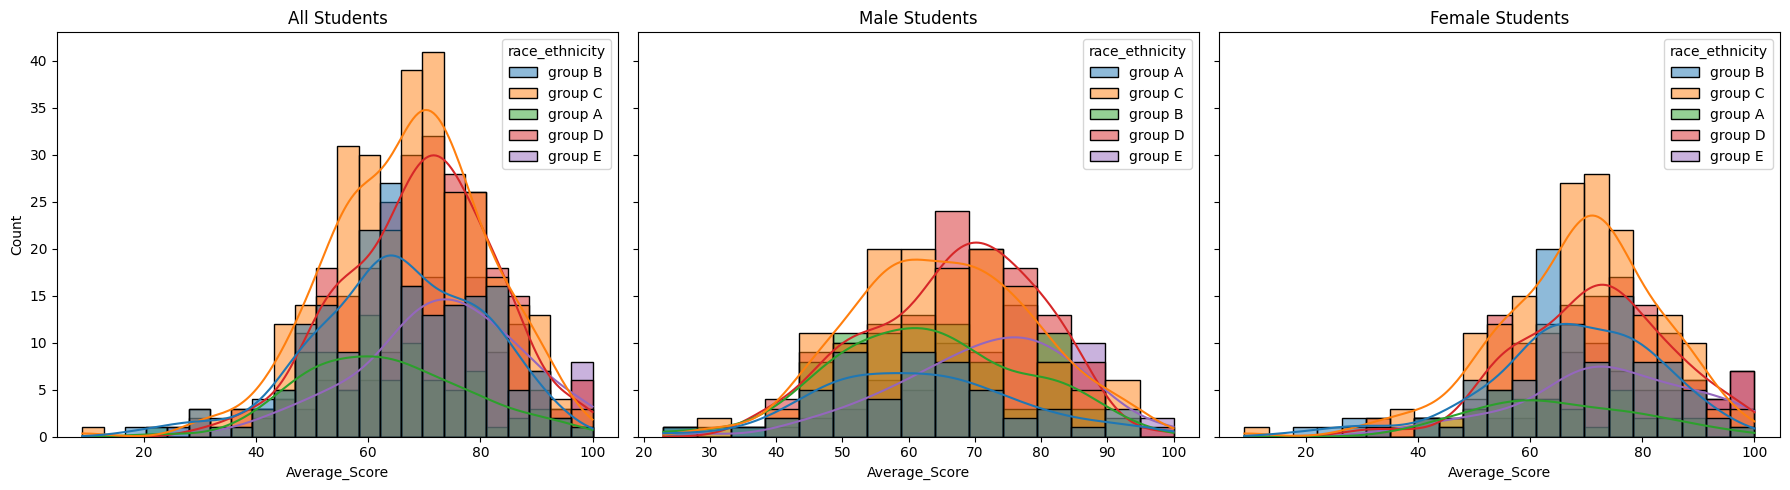

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# All students
sns.histplot(data=df, x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title("All Students")

# Male students
sns.histplot(data=df[df.gender=='male'], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title("Male Students")

# Female students
sns.histplot(data=df[df.gender=='female'], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title("Female Students")

plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

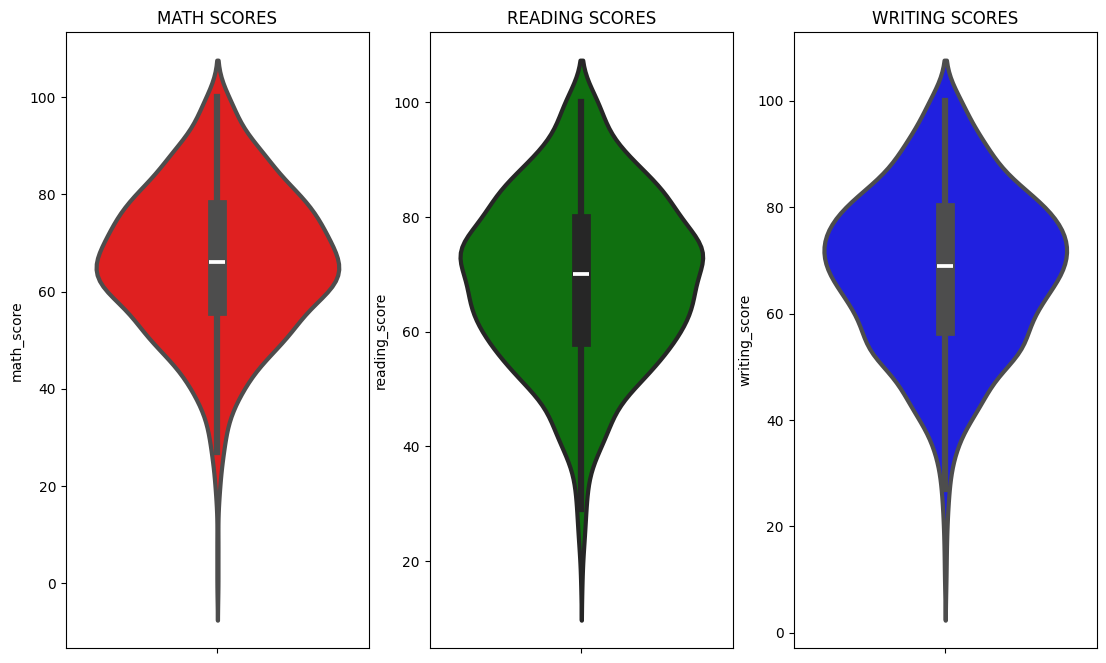

In [24]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

### Multiveriant analysis using pieplot


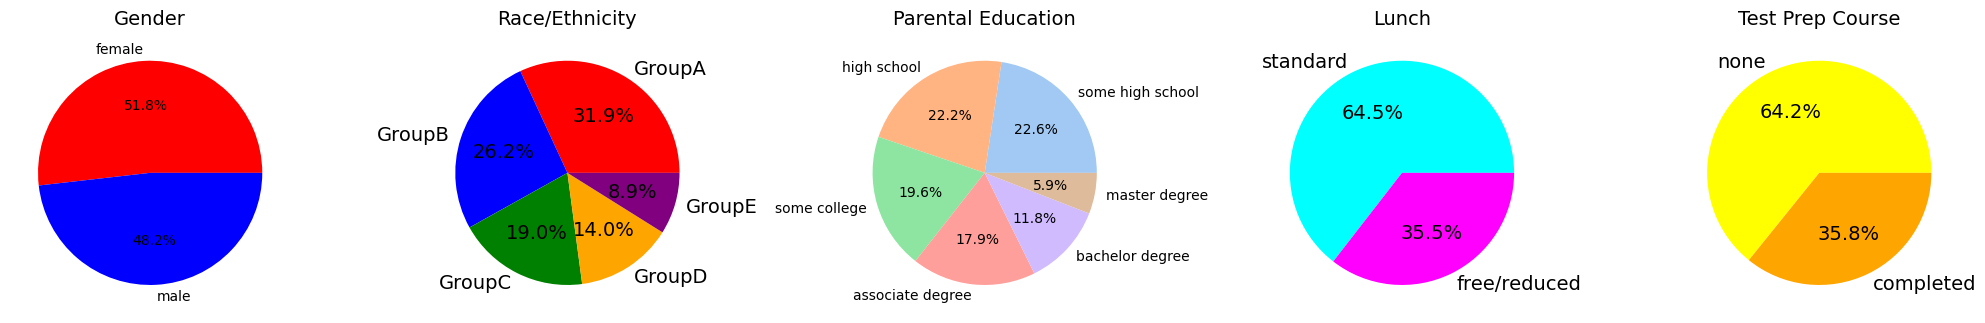

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))  # Increase figure width

# Gender
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=['female','male']
colors=['red','blue']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize':10})
plt.title('Gender', fontsize=14)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=['GroupA','GroupB','GroupC','GroupD','GroupE']
colors=['red','blue','green','orange','purple']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize':14})
plt.title('Race/Ethnicity', fontsize=14)
plt.axis('off')

# Parental Level of Education
plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=['some high school','high school','some college','associate degree','bachelor degree','master degree']
colors=sns.color_palette('pastel')[0:6]
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize':10})
plt.title('Parental Education', fontsize=14)
plt.axis('off')

# Lunch
plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard','free/reduced']
colors=['cyan','magenta']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize':14})
plt.title('Lunch', fontsize=14)
plt.axis('off')

# Test Preparation Course
plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=['none','completed']
colors=['yellow','orange']
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize':14})
plt.title('Test Prep Course', fontsize=14)
plt.axis('off')

plt.tight_layout()  # Prevents overlap
plt.show()


## Insites
- Number of male and female are equal
- Number of students in Group A is greatest
- Number of students have standard lunch
-  Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

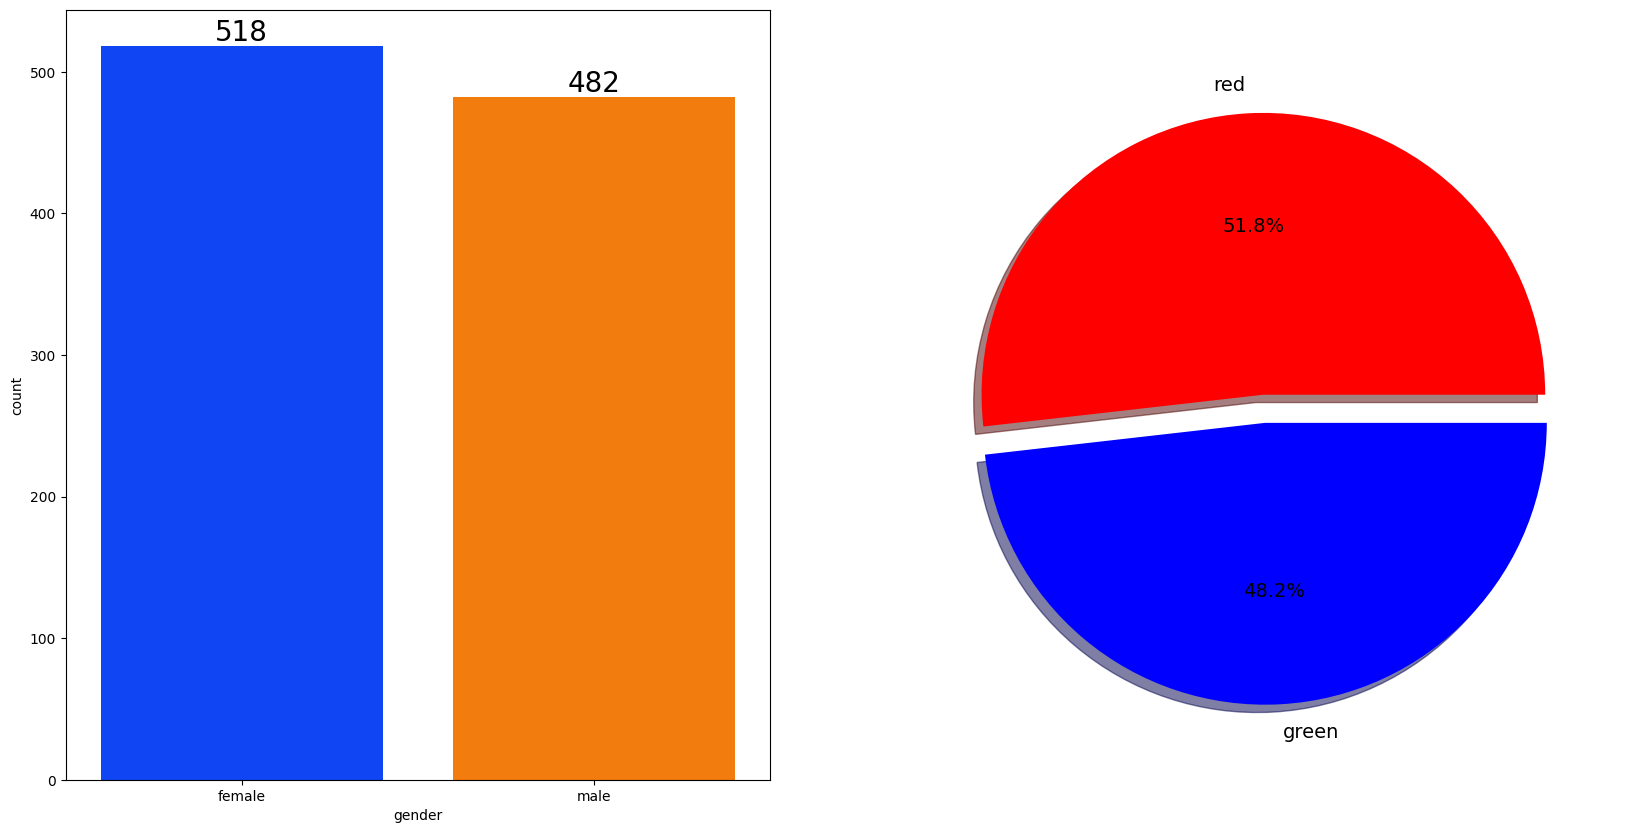

In [34]:
f,ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.90)
for container in ax[0].containers:
     ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['red','green'],explode=[0,0.1], autopct='%1.1f%%', textprops={'fontsize':14},shadow=True,colors=['red','blue'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [36]:
gende_group = df.groupby('gender')[numerical_col + ['Total_Score', 'Average_Score']].mean()
gende_group

,math_score,reading_score,writing_score,Total_Score,Average_Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


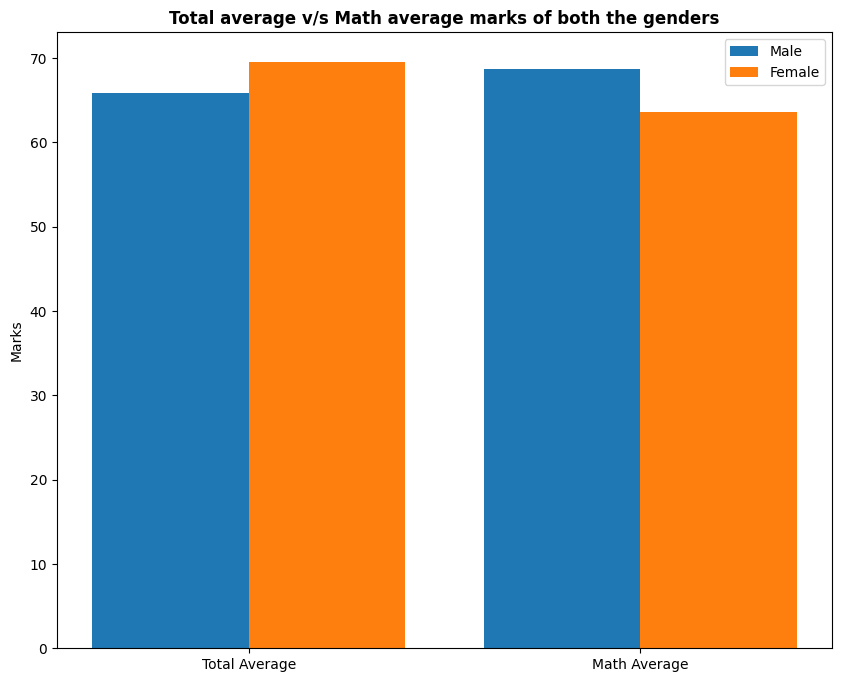

In [38]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gende_group['Average_Score']['female'], gende_group['math_score']['female']]
male_scores = [gende_group['Average_Score']['male'], gende_group['math_score']['male']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

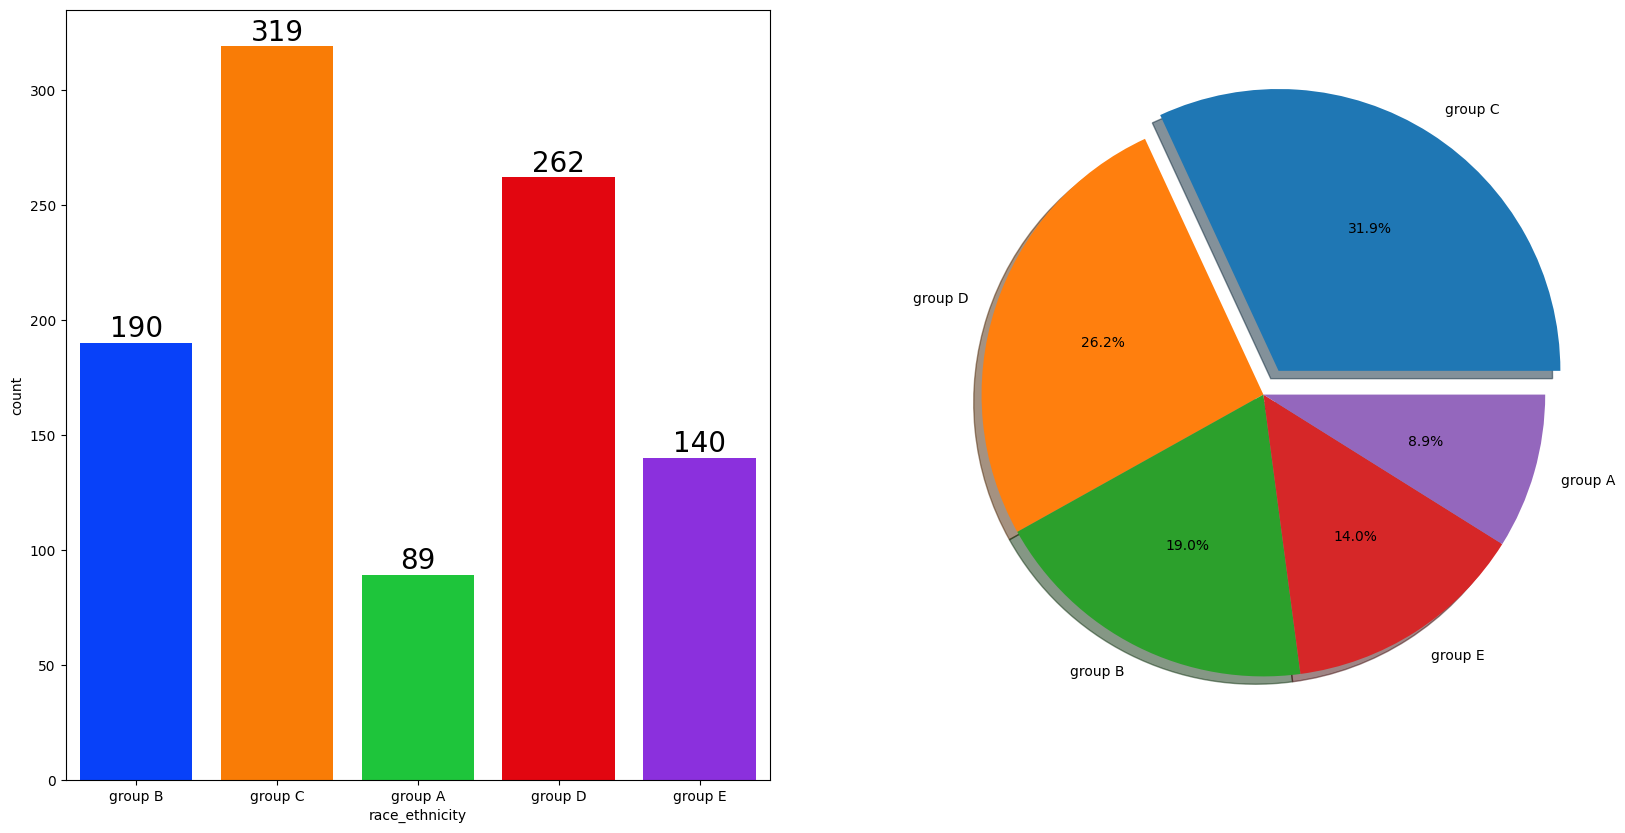

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index.tolist(),
        explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

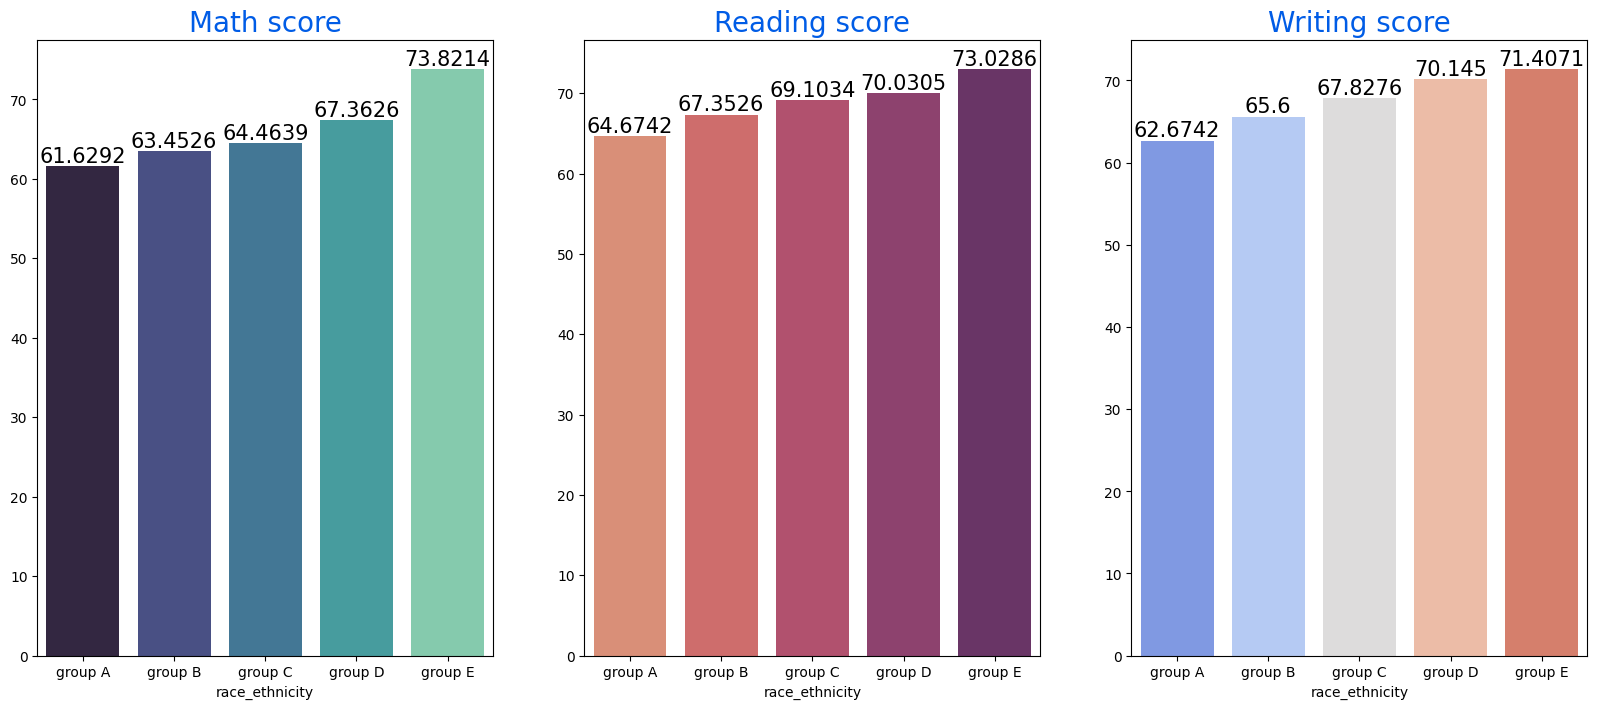

In [42]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects


#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

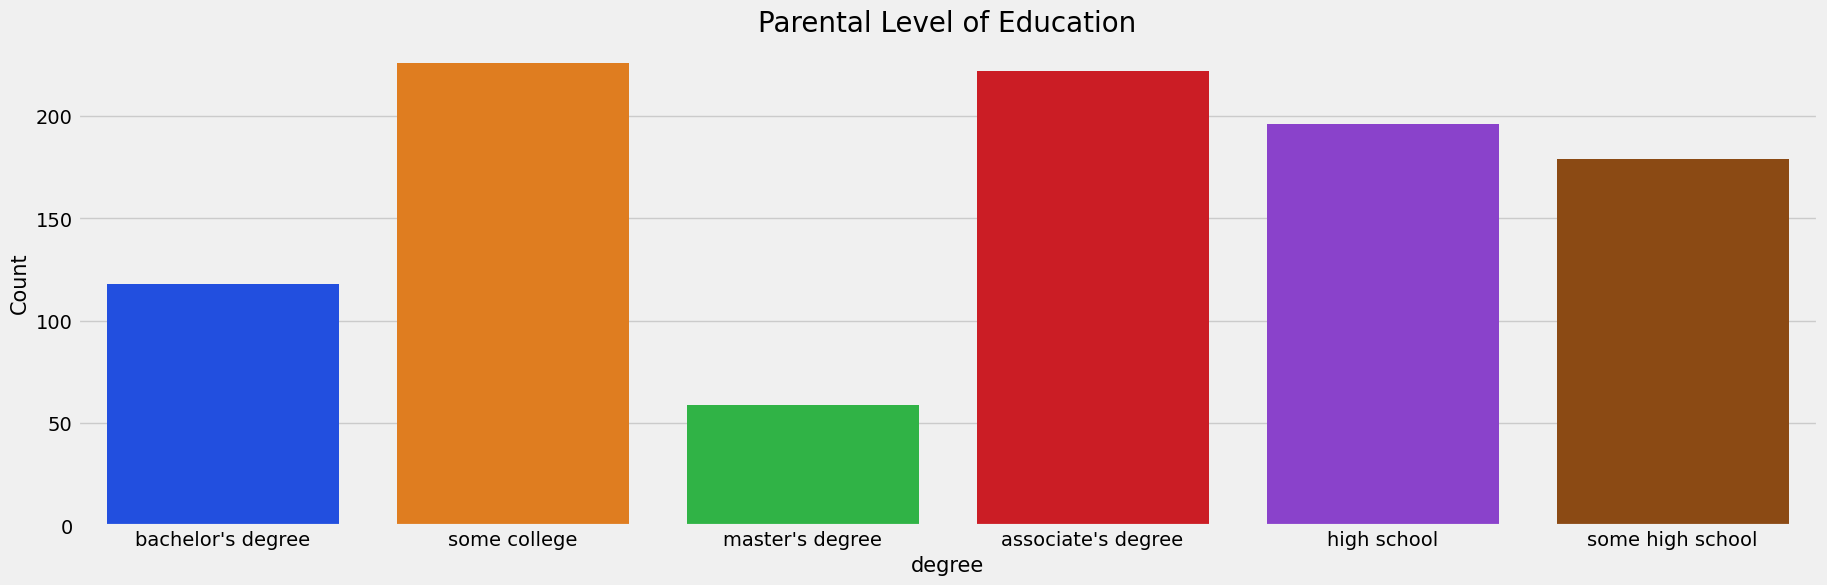

In [44]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright')
plt.title('Parental Level of Education', fontsize=20)
plt.xlabel('degree', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()



#### Insights 
- Largest number of parents are from some college.

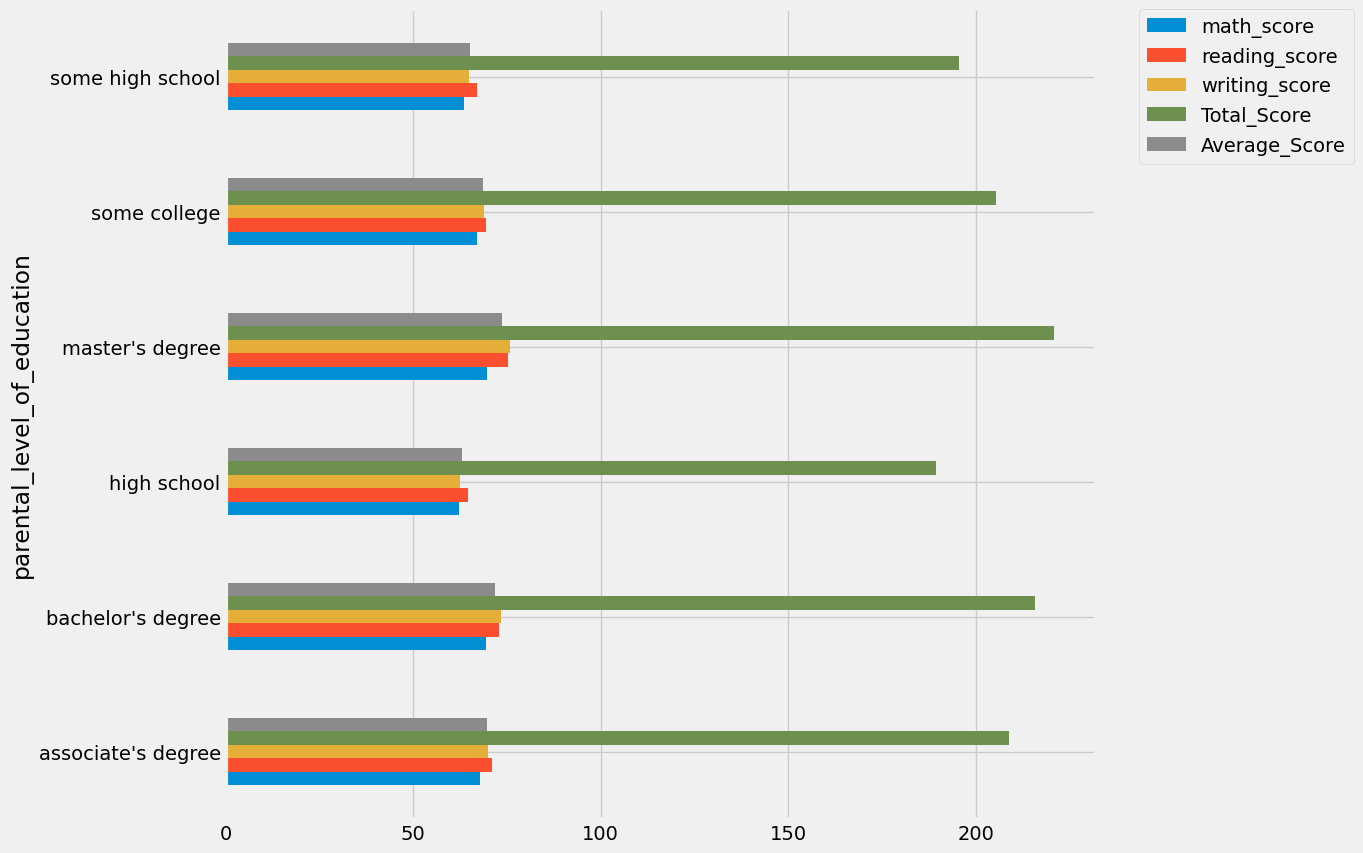

In [47]:
df.groupby('parental_level_of_education')[numerical_col + ['Total_Score', 'Average_Score']].mean().plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

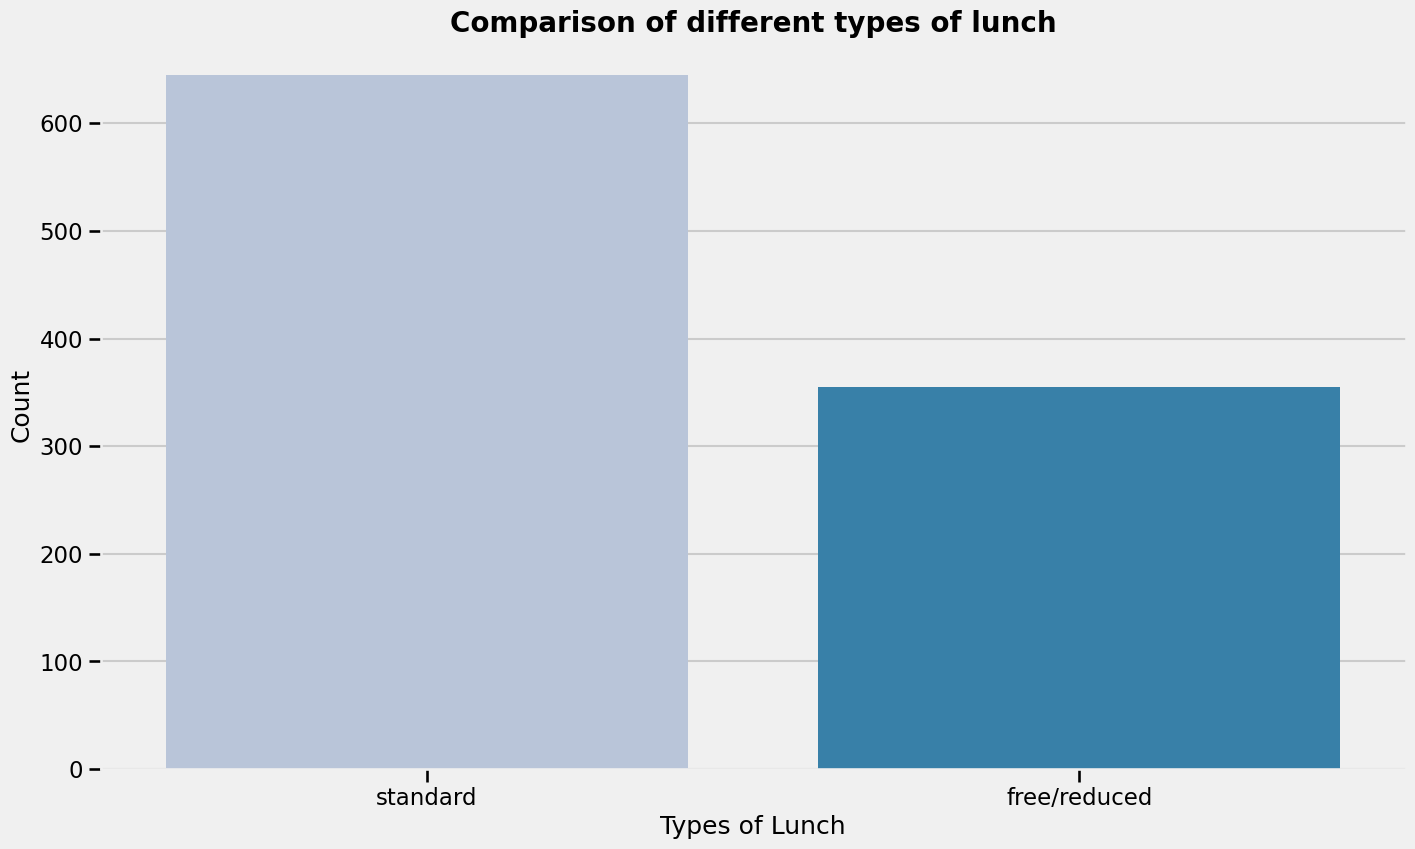

In [53]:
plt.rcParams['figure.figsize'] = (15, 9)

# Set seaborn context instead of plt.style
sns.set_context("talk")  

sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

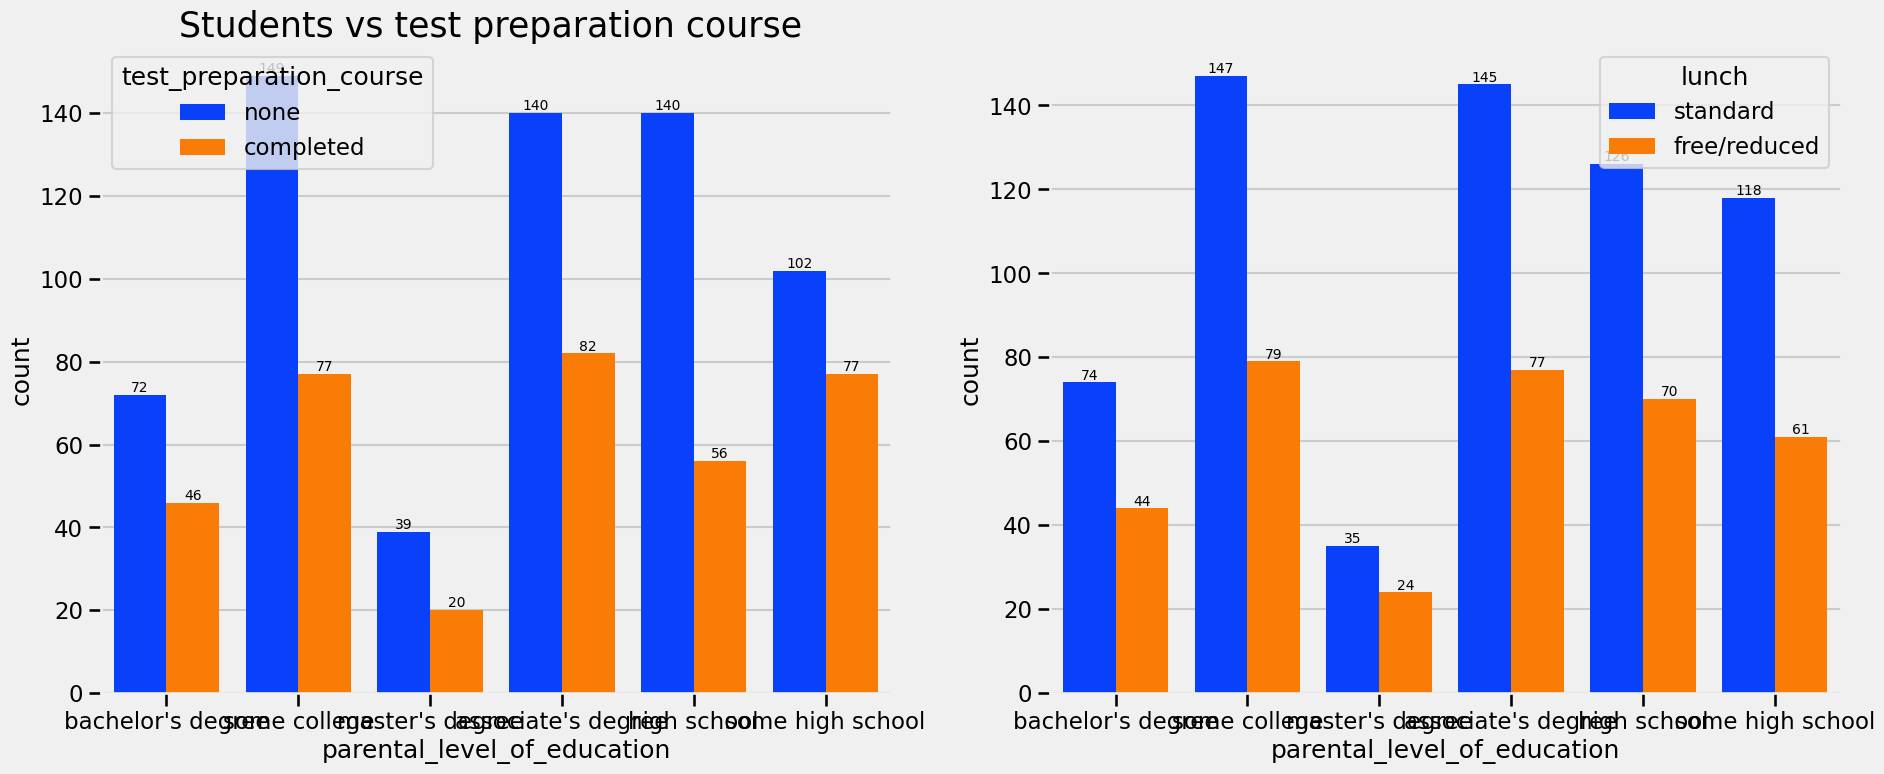

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

#### 4.4.6 CHECKING OUTLIERS

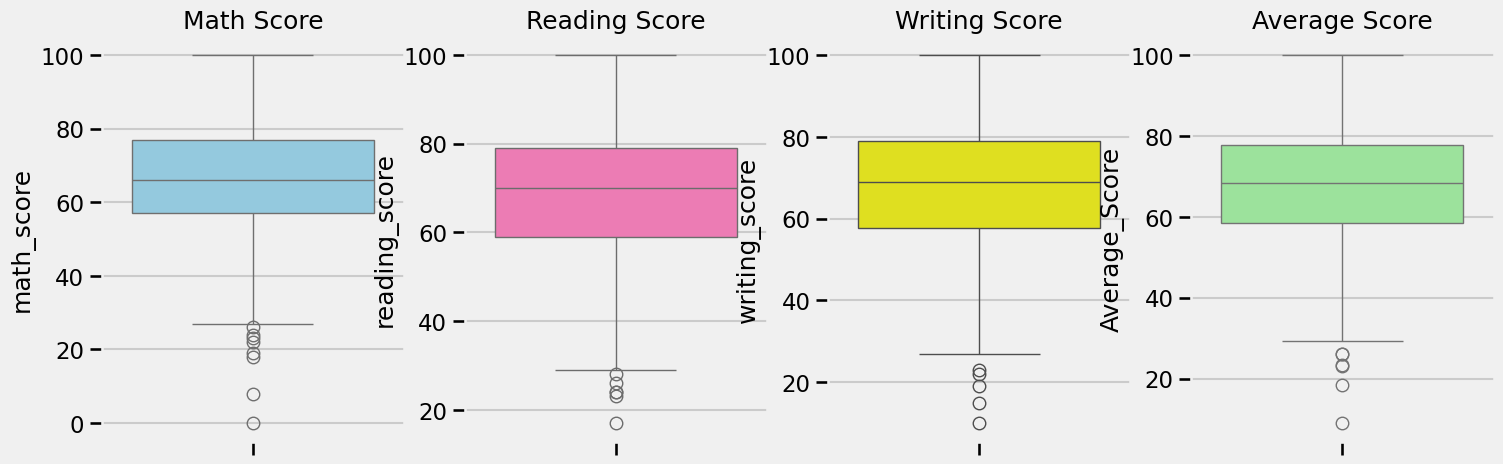

In [58]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Math Score')
plt.subplot(142)
sns.boxplot(y=df['reading_score'], color='hotpink')
plt.title('Reading Score')
plt.subplot(143)
sns.boxplot(y=df['writing_score'], color='yellow')
plt.title('Writing Score')
plt.subplot(144)
sns.boxplot(y=df['Average_Score'], color='lightgreen')
plt.title('Average Score')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

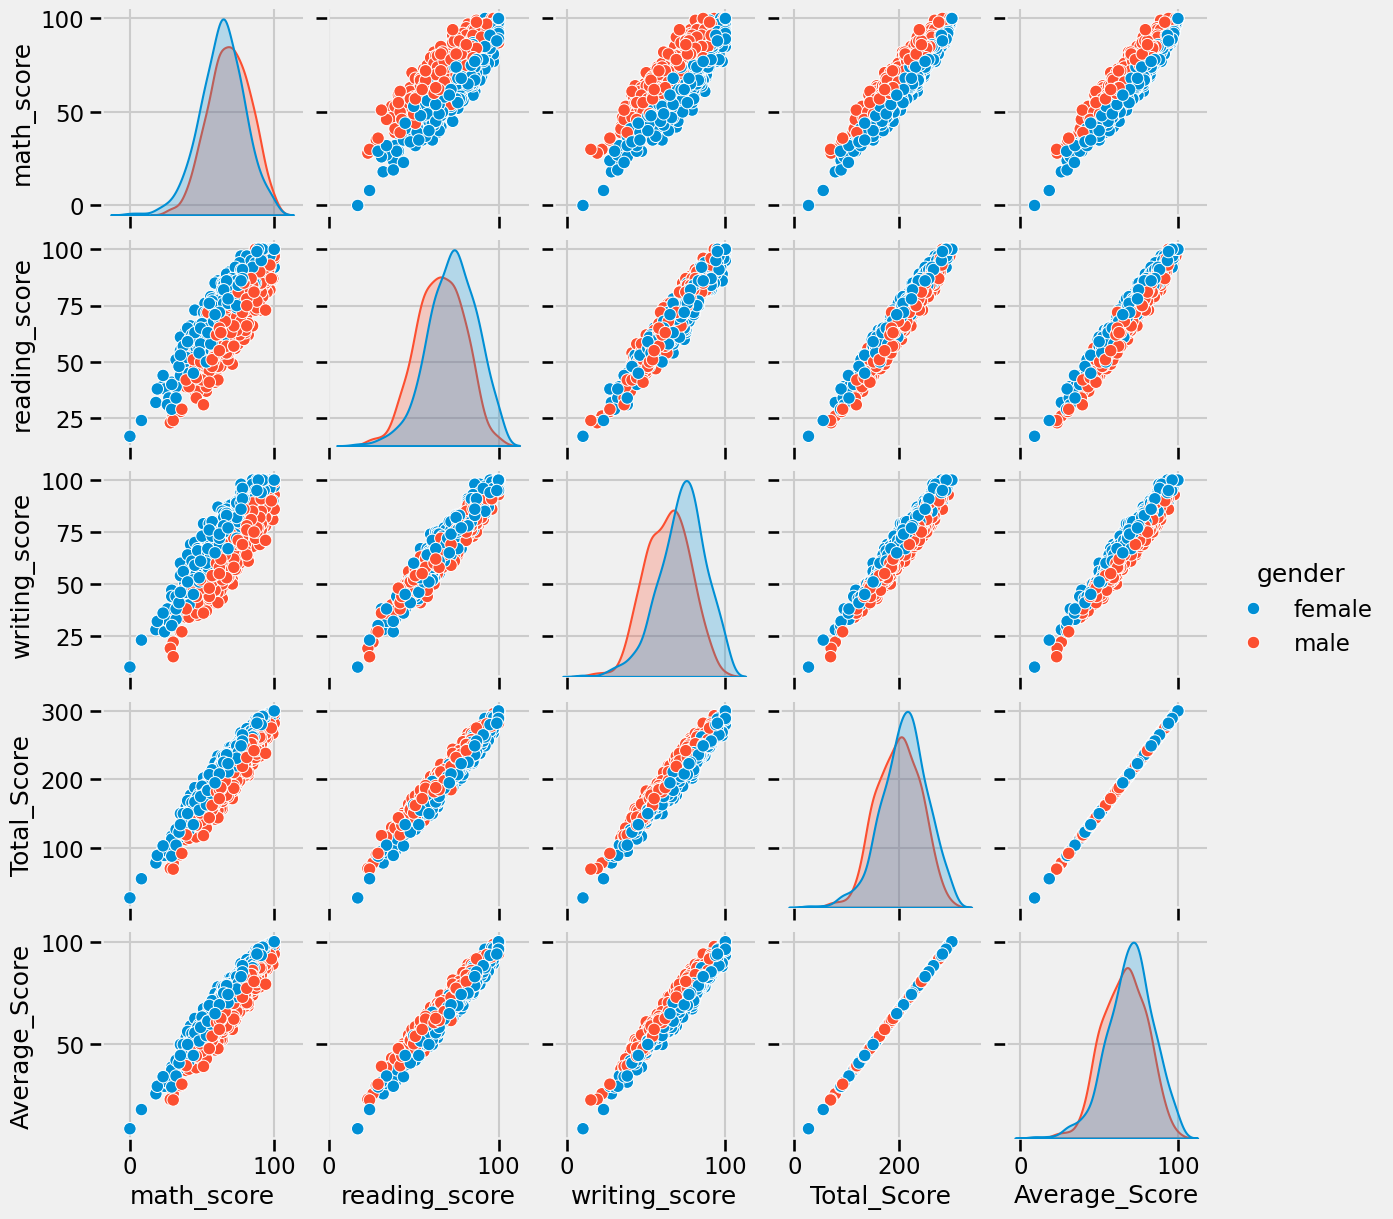

In [59]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.